# SI 618 Project Description

## Project Title

US Chronic Disease Indicators looking at Mental Health and alcohol use and reproductive health trends

## Team Members

- Lizett, Lizett Aguilar
- Saraizas, Shirley Araiza Santaella
- JRmcmill, Jonathan McMillan

## Overview

This project will explore three different Chronic Disease Indicators from the Centers for Disease Control (CDC). We are interested in seeing trends and patterns related to mental health, alcohol use among youth, and reproductive healthcare access.



## Motivation

These three data sets are from the Centers for Disease Control (CDC) US Chronic Disease Indicators, which are a set of agreed upon surveillance indicators for state and national public health agencies. These indicators are collected from a series of other data collection programs and compiled based on the indicator. The CDI is composed of 124 different indicators. According to the CDC, “18 topic groups: alcohol; arthritis; asthma; cancer; cardiovascular disease; chronic kidney disease; chronic obstructive pulmonary disease; diabetes; immunization; nutrition, physical activity, and weight status; oral health; tobacco; overarching conditions; and new topic areas that include disability, mental health, older adults, reproductive health, and school health. For the first time, CDI includes 22 indicators of systems and environmental change. A total of 201 individual measures are included for the 124 indicators, many of which overlap multiple chronic disease topic areas or are specific to a certain sex or age group.”

Citations:

Chronic disease Indicators, Overview. Centers for Disease Control. August 3rd, 2021. National Center for Chronic Disease Prevention and Health Promotion. https://www.cdc.gov/cdi/overview.html 




We chose the CDI data sets about: 
- Mental Health 
- Alcohol use 
- Reproductive Health 

Possible Questions: 
- How do negative mental health indicators correlate to the use of alcohol among youth?
- How does access to reproductive healthcare relate to mental health indicators?
- How does mental health, reproductive health care, and alcohol use among youth vary across states and demographics?

We are interested in exploring any potential relationships between mental health outcomes for youth and issues related to high risk activities such as alcohol use, as well as perceptions and access related to reproductive health outcomes. We are interested in exploring these particular issues with recent reports finding that youth substance use is linked to mental health distress. Although the data available about youth substance abuse that we were able to find didn't correspond as well with out current data sets we hope to find any patterns of those relationships in adult self reporting datasets. Additionally, we are interested in seeing if there are any relationships with mental health indicators and access to reproductive healthcare access, as access to care continues to face variation and volatility based on state contexts. In a recent report from the CDC as reported in the Associated press, “Mental health conditions were the leading underlying cause of pregnancy-related deaths from 2017 to 2019 with nearly 23% of pregnancy-related deaths attributed to mental health conditions, including suicides and overdoses from substance use disorders.”
Using mental health as an overarching theme, we intend to parse through any potential relationships with other significant public health measures, especially with these three areas finding increasing relevance in the current American healthcare context.

- Richtel, Matt. Teen Drug and Alcohol Use Linked to Mental Health Distress. New York Times. January 29th, 2024. https://www.nytimes.com/2024/01/29/health/teens-drugs-alcohol-mental-health.html

- Fernando, Christine. Mental health emerges as a dividing line in abortion rights initiatives planned for state ballots. February 13th, 2024. Associated Press. https://apnews.com/article/abortion-mental-health-ballot-maryland-missouri-arizona-6268ec88d1638009128b55fc56e3610c 

- Zaks, Nina. et al. Association Between Mental Health and Reproductive System Disorders in Women. Journal of the American Medical Association (JAMA). April 18th, 2023, 6(4): e238685. doi: 10.1001/jamanetworkopen.2023.8685



## Data Sources

We chose these three particular subsets of data due to the similarities in their structure. We are expected to be able to merge them with minimal risk of compromise to the data integrity.

- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Mental-Health/ixrt-gnsg/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Alcohol-use-among-y/y4cx-ipur/about_data
- https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-Reproductive-Health/xrn9-9eas/about_data

## Data Description and Manipulation

#### Imports for reading data, plotting, etc.

In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Read in the data

In [3]:
mental_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Mental_Health_20240217.csv')
alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')
reproductive_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Reproductive_Health_20240219.csv')

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_70847/655771790.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')


In [4]:
mental_health.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,32,MTH,MTH2_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,32,MTH,MTH1_0,MEAN,RACE,BLK,NaN,NaN,NaN,NaN


In [5]:
alcohol.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
1,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN


In [6]:
reproductive_health.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,NV,Nevada,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,NaN,%,Crude Prevalence,...,32,RPH,RPH1_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,NE,Nebraska,BRFSS,Reproductive Health,Timeliness of routine health care checkup amon...,NaN,%,Crude Prevalence,...,31,RPH,RPH1_0,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


#### Investigate sizes

In [7]:
for df in [mental_health, alcohol, reproductive_health]:
    print(df.shape)
    print()

(13200, 33)

(66091, 33)

(9086, 33)



We can see all three data sets have 33 columns, and thousands of rows.

#### Investigate columns of interest

In [8]:
# let's see what years we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.YearStart.unique()))
    print(sorted(df.YearEnd.unique()))
    print()

[2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]



In [9]:
# let's see what sources we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataSource.unique()))
    print()

['BRFSS', 'PRAMS']

['AEDS', 'APIS', 'BRFSS', 'Legal Research', 'NVSS', 'PRAMS', 'YRBSS']

['BRFSS', 'PRAMS']



In [10]:
# let's see what demographics we have data for
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory1.unique()))
    print(sorted(df.Stratification1.unique()))
    print()

['Gender', 'Overall', 'Race/Ethnicity']
['Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Gender', 'Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Asian, non-Hispanic', 'Black, non-Hispanic', 'Female', 'Hispanic', 'Male', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']

['Overall', 'Race/Ethnicity']
['American Indian or Alaska Native', 'Asian or Pacific Islander', 'Black, non-Hispanic', 'Hispanic', 'Multiracial, non-Hispanic', 'Other, non-Hispanic', 'Overall', 'White, non-Hispanic']



#### None for the 2nd and 3rd demographic categories:

In [11]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory2.unique()))
    print(sorted(df.Stratification2.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



In [12]:
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.StratificationCategory3.unique()))
    print(sorted(df.Stratification3.unique()))
    print()

[nan]
[nan]

[nan]
[nan]

[nan]
[nan]



#### Expanding the StratificationCategory1 column

In [13]:
for df in [mental_health, alcohol]:
    df['Gender'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Gender' else NaN, axis=1)

In [14]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Race/Ethnicity'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Race/Ethnicity' else NaN, axis=1)

In [15]:
for df in [mental_health, alcohol, reproductive_health]:
    df['Overall'] = df.apply(lambda row: row.Stratification1 if row.StratificationCategory1 == 'Overall' else NaN, axis=1)

In [16]:
# drop repetitive Stratification columns
drop_cols = ['StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

for df in [mental_health, alcohol, reproductive_health]:
    df.drop(drop_cols, axis=1, inplace=True)

In [17]:
mental_health.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LowConfidenceLimit,HighConfidenceLimit,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,17.2,26.8,NaN,32,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,2.4,5.8,NaN,32,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,4.4,5.6,NaN,32,MTH,MTH1_0,MEAN,Female,NaN,NaN


Expanded the stratification category for race, gender, and overall column, and then where ever there is a value in that row, that row will have a summary statistic for that demographic category. This was done for all three datasets.

#### Investigate Location data columns

In [18]:
for df in [mental_health, alcohol, reproductive_health]:
    print(df.LocationAbbr.nunique())
    print(df.LocationDesc.nunique())
    print(df.LocationID.nunique())
    print()

55
55
55

55
55
55

55
55
55



In [19]:
# print if the LocationAbbr, LocationDesc, and LocationID have the same values for each dataset
for location in ['LocationAbbr', 'LocationDesc', 'LocationID']:
    print(set(mental_health[location].unique()) == set(alcohol[location].unique()))
    print(set(mental_health[location].unique()) == set(reproductive_health[location].unique()))
    print(set(alcohol[location].unique()) == set(reproductive_health[location].unique()))
    print()

True
True
True

True
True
True

True
True
True



In [20]:
# just keep one of them, LocationDesc
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['LocationAbbr', 'LocationID'], axis=1, inplace=True)

In [21]:
# find columns in all DFs that only have NaN values
for df in [mental_health, alcohol, reproductive_health]:
    print(df.columns[df.isna().all()].tolist())

['Response', 'ResponseID']
['Response', 'ResponseID']
['Response', 'ResponseID']


In [22]:
# remove Reponse and ResponseID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['Response', 'ResponseID'], axis=1, inplace=True)

In [23]:
mental_health.head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,TopicID,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
0,2018,2018,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,21.6,NaN,NaN,17.2,26.8,MTH,MTH2_0,CRDPREV,NaN,NaN,Overall
1,2020,2020,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,4.1,NaN,NaN,2.4,5.8,MTH,MTH1_0,MEAN,NaN,"Black, non-Hispanic",NaN
2,2018,2018,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.6,MTH,MTH1_0,MEAN,Female,NaN,NaN


In [24]:
# print all unique Topic and TopicID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.Topic.unique()))
    print(sorted(df.TopicID.unique()))
    print()

['Mental Health']
['MTH']

['Alcohol']
['ALC']

['Reproductive Health']
['RPH']



In [25]:
# drop TopicID from all DFs
for df in [mental_health, alcohol, reproductive_health]:
    df.drop(['TopicID'], axis=1, inplace=True)

In [26]:
# get unique DataValueType and DataValueTypeID values for each DF
for df in [mental_health, alcohol, reproductive_health]:
    print(sorted(df.DataValueType.unique()))
    print(sorted(df.DataValueTypeID.unique()))
    print()

# and get the common DataValueType values across mental_health and alcohol, then mental_health and reproductive_health
print(set(mental_health.DataValueType.unique()) & set(alcohol.DataValueType.unique()))
print(set(mental_health.DataValueType.unique()) & set(reproductive_health.DataValueType.unique()))

['Age-adjusted Mean', 'Crude Prevalence', 'Mean']
['AGEADJMEAN', 'CRDPREV', 'MEAN']

['Age-adjusted Mean', 'Age-adjusted Prevalence', 'Age-adjusted Rate', 'Commercial host (dram shop) liability status for alcohol service', 'Crude Prevalence', 'Crude Rate', 'Local control of the regulation of alcohol outlet density', 'Mean', 'Number', 'Per capita alcohol consumption', 'US Dollars']
['AGEADJMEAN', 'AGEADJPREV', 'AGEADJRATE', 'COMMHSTLIAB', 'CRDPREV', 'CRDRATE', 'LCLCNTRLALC', 'MEAN', 'NMBR', 'PERCAPALC', 'USD']

['Crude Prevalence']
['CRDPREV']

{'Age-adjusted Mean', 'Crude Prevalence', 'Mean'}
{'Crude Prevalence'}


#### NOTE: *Crude Prevalence* is the answer to: How many *something* occurred per year for every 100,000 persons in the selected population?
[https://www.cdc.gov/injury/wisqars/mapping_help/crude_rate.html]

In [27]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].Question.unique()

array(['Recent mentally unhealthy days among adults aged >= 18 years'],
      dtype=object)

## Data Visualization

#### Let's look at some graphs of the data for MI

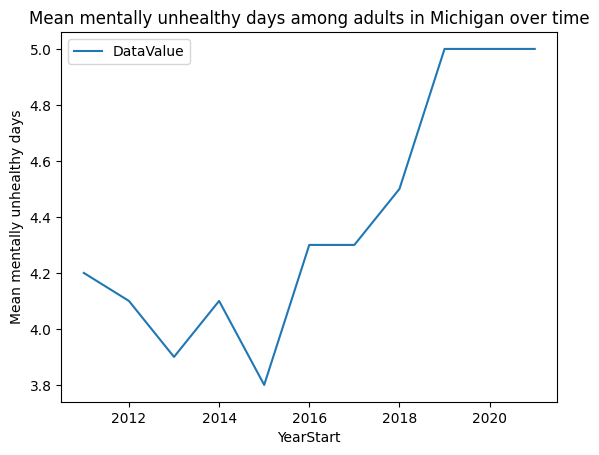

In [28]:
mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Mean mentally unhealthy days')
_ = plt.title('Mean mentally unhealthy days among adults in Michigan over time')

In [29]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].head(3)

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall
40651,2018,2018,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.8,4.8,NaN,NaN,4.4,5.2,ALC3_0,MEAN,NaN,NaN,Overall
40861,2021,2021,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,5.0,5.0,NaN,NaN,4.4,5.7,ALC3_0,MEAN,NaN,NaN,Overall
40936,2017,2017,Michigan,BRFSS,Alcohol,Binge drinking frequency among adults aged >= ...,Number,Mean,4.5,4.5,NaN,NaN,4.2,4.9,ALC3_0,MEAN,NaN,NaN,Overall


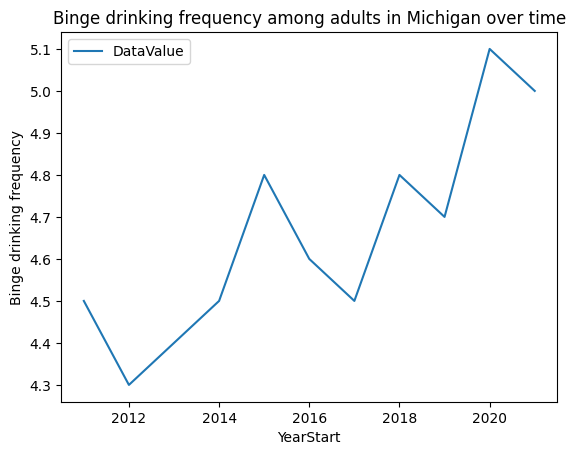

In [30]:
alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.ylabel('Binge drinking frequency')
_ = plt.title('Binge drinking frequency among adults in Michigan over time')

#### And combined for correlation

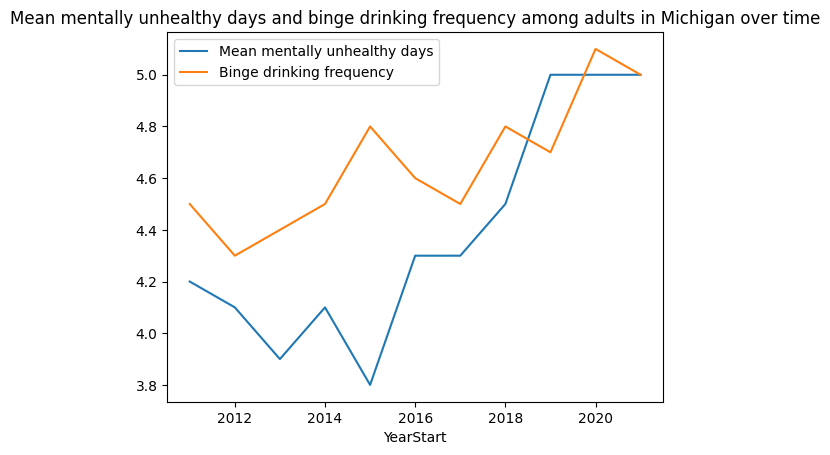

In [31]:
mh_mi = mental_health[(mental_health.DataValueType == 'Mean') & (mental_health.LocationDesc == 'Michigan') & (mental_health.Overall == 'Overall')]
al_mi = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.LocationDesc == 'Michigan') & (alcohol.Overall == 'Overall') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart').plot(x='YearStart', y=['DataValue_mh', 'DataValue_al'], kind='line')
plt.legend(['Mean mentally unhealthy days', 'Binge drinking frequency'])
_ = plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')

We see an interesting trend among the two variables over time, something to consider investigating in the future.

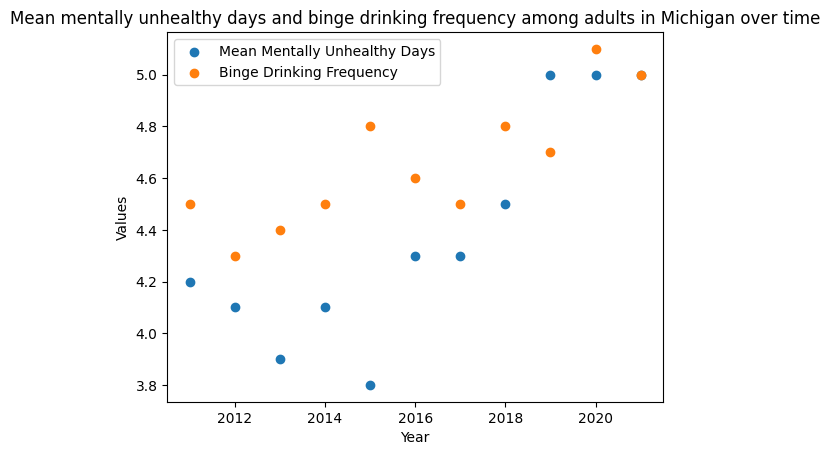

In [32]:
# Merge the DataFrames
mh_al_mi = mh_mi.merge(al_mi, on='YearStart', suffixes=('_mh', '_al'), how='inner').sort_values(by='YearStart')

# Create a scatter plot of the line plot
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_mh'], label='Mean Mentally Unhealthy Days')
plt.scatter(mh_al_mi['YearStart'], mh_al_mi['DataValue_al'], label='Binge Drinking Frequency')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan over time')
plt.legend()
plt.show()

In [33]:
# find the correlation coefficient between the two variables
corr_mh_al_mi = mh_al_mi['DataValue_mh'].corr(mh_al_mi['DataValue_al'])
print("Correlation Coefficient of Mean Mentally Unhealthy Data and Binge Drinking in Michigan:", corr_mh_al_mi)


Correlation Coefficient of Mean Mentally Unhealthy Data and Binge Drinking in Michigan: 0.6904164189808101


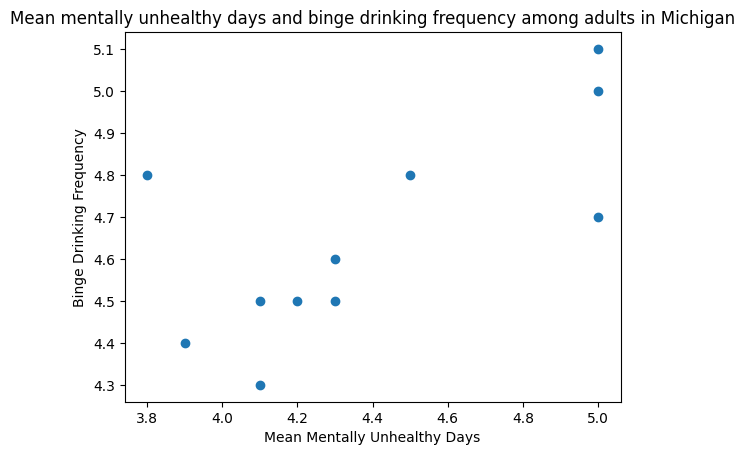

In [34]:
plt.scatter(mh_al_mi['DataValue_mh'], mh_al_mi['DataValue_al'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Binge Drinking Frequency')
plt.title('Mean mentally unhealthy days and binge drinking frequency among adults in Michigan')
_ = plt.show()

Positive correlation of 0.7 between the incidence of binge drinking and average mentally unhealthy days in the state of Michigan, indicating that binge drinking increases as people self report mentally unhealthy days.

In [35]:
# get unique Question values for reproductive_health
reproductive_health.Question.unique()

array(['Timeliness of routine health care checkup among women aged 18-44 years',
       'Postpartum checkup', 'Folic acid supplementation'], dtype=object)

In [36]:
# and get the reported aggregate values for Michigan
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall')].Question.unique()

array(['Postpartum checkup', 'Folic acid supplementation',
       'Timeliness of routine health care checkup among women aged 18-44 years'],
      dtype=object)

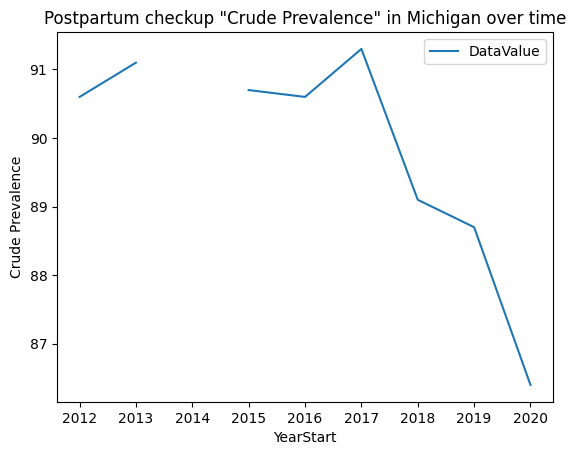

In [37]:
reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')].sort_values(by='YearStart').plot(x='YearStart', y='DataValue', kind='line')
plt.title('Postpartum checkup "Crude Prevalence" in Michigan over time')
plt.ylabel('Crude Prevalence')
_ = plt.show()

In [38]:
# check reproductive_health for missing YearStart values of 2013 to 2015
reproductive_health[(reproductive_health.YearStart <= 2013) | (reproductive_health.YearStart >= 2015)].YearStart.unique()

array([2012, 2016, 2013, 2015, 2017, 2019, 2020, 2018, 2021, 2011])

We can see the reproductive health data set is missing a *YearStart* of 2014.

In [39]:
# let's find the correlation coefficient between the two variables
rh_mi = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.LocationDesc == 'Michigan') & (reproductive_health.Overall == 'Overall') & (reproductive_health.Question == 'Postpartum checkup')]
mh_rh_mi = mh_mi.merge(rh_mi, on='YearStart', suffixes=('_mh', '_rh'), how='inner').sort_values(by='YearStart')
mh_rh_mi['DataValue_mh'].corr(mh_rh_mi['DataValue_rh'])

-0.8402165453495583

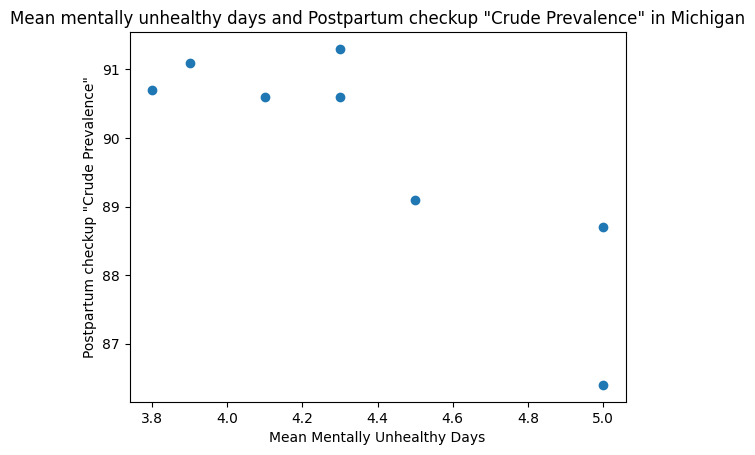

In [40]:
# now let's plot the scatter plot
plt.scatter(mh_rh_mi['DataValue_mh'], mh_rh_mi['DataValue_rh'])
plt.xlabel('Mean Mentally Unhealthy Days')
plt.ylabel('Postpartum checkup "Crude Prevalence"')
plt.title('Mean mentally unhealthy days and Postpartum checkup "Crude Prevalence" in Michigan')
_ = plt.show()

Strong negative correlation of -0.84, indicating that as the number of postpartum checkups decreased, that was associated with a higher average of overall mentally unhealthy days.

#### Distributions of means across data sets

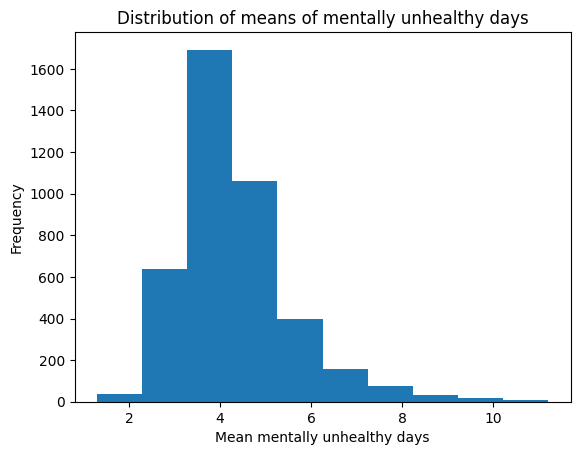

In [41]:
# histogram of means of mentally unhealthy days
mental_health[mental_health.DataValueType == 'Mean'].DataValue.plot(kind='hist')
plt.xlabel('Mean mentally unhealthy days')
_ = plt.title('Distribution of means of mentally unhealthy days')

We can see the distribution of means is "normal-ish", and right skewed, indicating the number of reported mentally-unhealthy days tends toward the lower values.

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_70847/3109894760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')


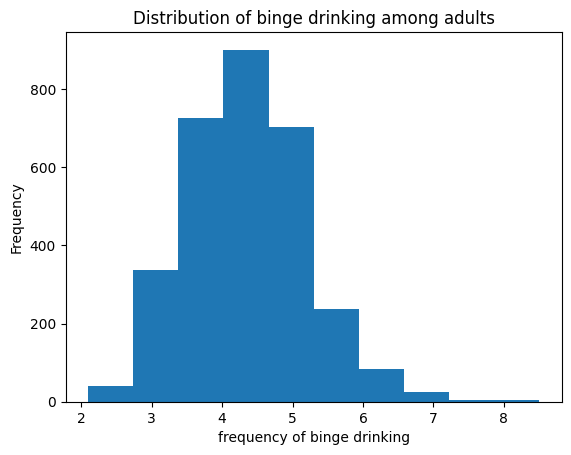

In [42]:
# histogram of means of binge drinking frequency, ignoring NaN values
df = alcohol[(alcohol.DataValueType == 'Mean') & (alcohol.Question == 'Binge drinking frequency among adults aged >= 18 years who binge drink')]
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
df.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of binge drinking among adults')
plt.xlabel('frequency of binge drinking')
_ = plt.show()

This distribution is also fairly normal. It's also right skewed, but less so than the the mental health means.

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_70847/3425637516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')


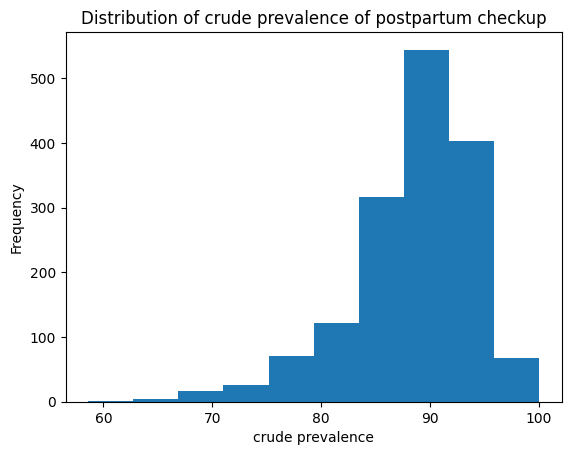

In [43]:
# histogram of crude prevalence of postpartum checkup
df = reproductive_health[(reproductive_health.DataValueType == 'Crude Prevalence') & (reproductive_health.Question == 'Postpartum checkup')]
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')
df.DataValue.dropna().plot(kind='hist')
plt.title('Distribution of crude prevalence of postpartum checkup')
plt.xlabel('crude prevalence')
_ = plt.show()

Finally, we have another normal distribution for "crude prevalence" of postpartum checkup. While the prior distributions were right skewed, this one appears left skewed, indicating a more optimistic statistic that it's more common for higher percentages of populations to have postpartum checkups.

Overall, we have a lot to work with across these three data sets. We have further ideas for investigating trends across various demographics like race and gender, and feel confident we can perform statistical tests with our aggregate data since the confidence interval values are included. We plan to merge the alcohol and reproductive health data sets separately with the mental health data set when conducting further analysis, as needed, since the main focus is mental health impacts.

# Project Analysis Part 2

### Descriptive Statistics

Provide a comprehensive summary of your combined dataset using descriptive statistics. This should include means, medians, modes, ranges, variance, and standard deviations for the relevant features of your data. The descriptive statistics should inform your guiding questions that you developed in Part I of the project, rather than merely providing an overview of your data. Interpret these results to draw preliminary conclusions about the data.


- Part of our analysis includes comparing a merged data set of mental health, alcohol use, and reproductive health for the state of Michigan. Step two of our project includes comparing these sames outcomes to a similarly joined data set for the greater United States. We are interested in looking at demographic information such as race and ethnicity, gender, and location.


In [44]:
mental_health['DataValue'] = mental_health['DataValue'].astype(str)
alcohol['DataValue'] = alcohol['DataValue'].astype(str)


#### Merging of Mental Health and Alcohol Chronic Disease Indicators for Greater United States, short hand is MA 

In [45]:
national_merged_MA = pd.merge(mental_health, alcohol, on=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueType', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID', 'DataValueTypeID', 'Gender', 'Race/Ethnicity'], how='outer')

In [46]:
national_merged_MA.head()

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
0,2009,2011,Alabama,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
1,2009,2011,Alaska,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
2,2009,2011,Arizona,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
3,2009,2011,Arkansas,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,18.0,18.0,...,21.6,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
4,2009,2011,California,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN


### mean, median, mode, standard deviation, variance for data values in MA dataset

In [47]:
national_merged_MA['DataValueAlt'].describe().round(3)

count    53685.000
mean        42.844
std        599.052
min          0.000
25%          4.800
50%          7.700
75%         16.100
max      51642.000
Name: DataValueAlt, dtype: float64

In [48]:
national_merged_MA['DataValueAlt'].var().round(3)

358863.657

### Below is specific data analysis based on our variables of interest, MA set

In [49]:
national_merged_MA['Race/Ethnicity'].describe()

count                   50908
unique                      8
top       White, non-Hispanic
freq                    10054
Name: Race/Ethnicity, dtype: object

In [50]:
national_merged_MA.groupby(['Race/Ethnicity'])['DataValue'].describe()

,count,unique,top,freq
Race/Ethnicity,,,,
American Indian or Alaska Native,2332,390,nan,1788
Asian or Pacific Islander,2002,215,nan,1587
"Asian, non-Hispanic",330,79,nan,226
"Black, non-Hispanic",10054,575,nan,4896
Hispanic,10054,607,nan,4365
"Multiracial, non-Hispanic",8041,423,nan,5786
"Other, non-Hispanic",8041,274,nan,4919
"White, non-Hispanic",10054,988,nan,577


- total counts for Race/Ethnicity in MA dataset is 50,908
- eight unique race/ethnicity categories
- most common racial/ethnic demographic is white, non-Hispanic at 10,054

In [51]:
national_merged_MA.groupby(['LocationDesc'])['DataValue'].describe()

,count,unique,top,freq
LocationDesc,,,,
Alabama,1475,276,nan,528
Alaska,1496,331,nan,495
Arizona,1440,320,nan,355
Arkansas,1482,299,nan,546
California,1433,337,nan,156
Colorado,1489,344,nan,394
Connecticut,1482,323,nan,380
Delaware,1496,301,nan,554
District of Columbia,1454,314,nan,504


In [52]:
national_merged_MA.groupby('Race/Ethnicity')['LocationDesc'].describe()

,count,unique,top,freq
Race/Ethnicity,,,,
American Indian or Alaska Native,2332,55,Washington,48
Asian or Pacific Islander,2002,53,Vermont,42
"Asian, non-Hispanic",330,55,Alabama,6
"Black, non-Hispanic",10054,55,Washington,191
Hispanic,10054,55,Washington,191
"Multiracial, non-Hispanic",8041,55,Illinois,152
"Other, non-Hispanic",8041,55,Illinois,152
"White, non-Hispanic",10054,55,Washington,191


#### Descriptive Stats about race/ethnicity and question in alcohol data set

In [53]:
question_counts = national_merged_MA.groupby(['Race/Ethnicity', 'Question']).size().reset_index(name='Count')

question_counts_sorted = question_counts.sort_values(['Race/Ethnicity', 'Count'], ascending=[True, False])

top_questions_by_race = question_counts_sorted.groupby('Race/Ethnicity').head(1)

top_questions_by_race


,Race/Ethnicity,Question,Count
3,American Indian or Alaska Native,Chronic liver disease mortality,1683
5,Asian or Pacific Islander,Chronic liver disease mortality,1683
6,"Asian, non-Hispanic",Alcohol use among youth,220
16,"Black, non-Hispanic",Chronic liver disease mortality,1683
28,Hispanic,Chronic liver disease mortality,1683
34,"Multiracial, non-Hispanic",Binge drinking frequency among adults aged >= ...,1188
43,"Other, non-Hispanic",Binge drinking frequency among adults aged >= ...,1188
58,"White, non-Hispanic",Chronic liver disease mortality,1683


The most frequently reported health issue among most racial and ethnic groups, including American Indian or Alaska Native, Asian or Pacific Islander, Black, non-Hispanic, Hispanic, and White, non-Hispanic, is chronic liver disease mortality, each with 1683 counts. In contrast, the most prevalent issues reported for Asian, non-Hispanic, and Multiracial, non-Hispanic groups are alcohol use among youth (220 counts) and binge drinking frequency among adults aged >= 18 years (1188 counts), respectively.

In [54]:
# national_merged_MA for 'Per capita alcohol consumption' by state

national_alcohol_percapita_df = national_merged_MA[(national_merged_MA.DataValueType == 'Per capita alcohol consumption')]
national_alcohol_percapita_df

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
55,2010,2010,Alabama,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.0,2.00,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
80,2010,2010,Alaska,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,3.0,3.00,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
105,2010,2010,Arizona,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.4,2.40,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
130,2010,2010,Arkansas,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,1.8,1.80,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
155,2010,2010,California,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.2,2.20,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73075,2020,2020,Virginia,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.27,2.27,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
73210,2020,2020,Washington,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,2.26,2.26,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
73345,2020,2020,West Virginia,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,1.82,1.82,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall
73480,2020,2020,Wisconsin,AEDS,Alcohol,Per capita alcohol consumption among persons a...,NaN,Per capita alcohol consumption,3.11,3.11,...,NaN,ALC7_0,PERCAPALC,NaN,NaN,NaN,gallons,NaN,NaN,Overall


#### Below is the merging of all data sets denoted as MR (Mental Health and Reproductive Health)

In [55]:
df.head()

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,QuestionID,DataValueTypeID,Race/Ethnicity,Overall
2,2013,2013,Hawaii,PRAMS,Reproductive Health,Postpartum checkup,%,Crude Prevalence,88.2,88.2,NaN,NaN,85.7,90.2,RPH2_0,CRDPREV,NaN,Overall
3,2013,2013,Kentucky,PRAMS,Reproductive Health,Postpartum checkup,%,Crude Prevalence,NaN,NaN,-,No data available,NaN,NaN,RPH2_0,CRDPREV,NaN,Overall
4,2013,2013,Maryland,PRAMS,Reproductive Health,Postpartum checkup,%,Crude Prevalence,89.1,89.1,NaN,NaN,86.8,91.0,RPH2_0,CRDPREV,NaN,Overall
5,2016,2016,Maryland,PRAMS,Reproductive Health,Postpartum checkup,%,Crude Prevalence,89.0,89.0,NaN,NaN,86.7,90.9,RPH2_0,CRDPREV,NaN,Overall
6,2014,2014,Maine,PRAMS,Reproductive Health,Postpartum checkup,%,Crude Prevalence,92.0,92.0,NaN,NaN,89.4,94.0,RPH2_0,CRDPREV,"White, non-Hispanic",NaN


In [56]:
df['DataValue'] = df['DataValue'].astype(str)

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_70847/501871676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DataValue'] = df['DataValue'].astype(str)


In [57]:
national_merged_MR= pd.merge(mental_health, df, on=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'DataValueType', 'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'QuestionID', 'DataValueTypeID','Race/Ethnicity'], how='outer')

Descriptive Statistics, Mental health and Reproductive Health, MR for shorthand

In [58]:
national_merged_MR.head()

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueUnit_x,DataValueType,DataValue,DataValueAlt,...,HighConfidenceLimit,QuestionID,DataValueTypeID,Gender,Race/Ethnicity,Overall_x,DataValueUnit_y,DataValueFootnoteSymbol_y,DatavalueFootnote_y,Overall_y
0,2009,2011,Alabama,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
1,2009,2011,Alaska,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
2,2009,2011,Arizona,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
3,2009,2011,Arkansas,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,18.0,18.0,...,21.6,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN
4,2009,2011,California,PRAMS,Mental Health,Postpartum depressive symptoms,%,Crude Prevalence,nan,NaN,...,NaN,MTH3_0,CRDPREV,NaN,NaN,Overall,NaN,NaN,NaN,NaN


In [59]:
national_merged_MR['DataValue'] = pd.to_numeric(national_merged_MR['DataValue'], errors='coerce')

Mean, median, count, standard deviation, variance for MR data set

In [60]:
national_merged_MR['DataValue'].describe().round(3)

count    12288.000
mean        17.206
std         27.854
min          1.200
25%          3.700
50%          4.700
75%         13.600
max        100.000
Name: DataValue, dtype: float64

In [61]:
national_merged_MR['DataValue'].var().round(3)

775.822

In [62]:
national_merged_MR.groupby(['Race/Ethnicity'])['DataValue'].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Race/Ethnicity,,,,,,,,
American Indian or Alaska Native,85.0,77.378,5.716,58.6,73.100,78.10,81.700,91.9
Asian or Pacific Islander,190.0,90.948,5.417,68.3,88.625,91.80,94.400,99.5
"Black, non-Hispanic",1415.0,20.745,29.918,2.3,4.100,5.10,17.200,99.7
Hispanic,1662.0,20.253,30.268,1.6,3.700,4.95,14.475,98.2
"Multiracial, non-Hispanic",1222.0,17.066,25.673,2.8,5.500,6.70,9.200,100.0
"Other, non-Hispanic",1255.0,6.201,8.721,1.2,3.200,4.10,5.600,99.1
"White, non-Hispanic",1959.0,21.693,31.489,1.3,3.900,5.00,17.850,98.4


In [63]:
national_merged_MR['DataValue'].var().round(3)

775.822

The summary statistics show that the datasets have similar mean values for various numeric variables across different years, with moderate standard deviations indicating some variability. Additionally, the ranges of the data suggest a spread from the minimum to maximum values, while quartiles provide insight into the central tendency and variability of the data distribution.

- Standard Deviation for Data Values Total is at 27.854
- - for race and ethnicity, broken down the data shows highest disbursement among Black, Hispanic, Multi-Racial, and White non-Hispanic population
- Variance, or spread of data points in the reproductive health and mental health national set is 775.822, indicating more dispersion from the mean.

# Inferential Statistics

- Conduct appropriate hypothesis tests to investigate if there are significant differences or correlations within your data. This might involve regression analysis, ANOVA, and/or chi-squared tests.

- Clearly state your null and alternative hypotheses, choose an appropriate significance level, and
discuss your findings. Make sure to justify the choice of your tests.

In [153]:
# Rename the column
national_merged_MA = national_merged_MA.rename(columns={'Race/Ethnicity': 'Race_Ethnicity'})

# Drop rows with null values in the specified columns
national_merged_MA = national_merged_MA.dropna(subset=['DataValue', 'Race_Ethnicity', 'LocationDesc'])

#regression analysis
MA_model = smf.ols('DataValue ~ Race_Ethnicity + LocationDesc', data=national_merged_MA).fit()
print(MA_model.summary())


                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.64
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.11e-133
Time:                        02:15:46   Log-Likelihood:            -1.6688e+05
No. Observations:               26764   AIC:                         3.339e+05
Df Residuals:                   26702   BIC:                         3.344e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [155]:
# ANOVA
anova_results = sm.stats.anova_lm(MA_model, typ=2)
anova_results


,sum_sq,df,F,PR(>F)
Race_Ethnicity,6.739298e+06,7.0,62.960123,2.531849e-90
LocationDesc,6.964030e+06,54.0,8.433655,3.164579e-64
Residual,4.083145e+08,26702.0,NaN,NaN


In [159]:
from scipy import stats
# Chi-squared test
MA_contingency_table = pd.crosstab(national_merged_MA['Race_Ethnicity'], national_merged_MA['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(MA_contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

Chi2 value: 7339.508960736069, p-value: 0.0


In [160]:
# Rename the column
national_merged_MR = national_merged_MR.rename(columns={'Race/Ethnicity': 'Race_Ethnicity'})

# Drop rows with null values in the specified columns
national_merged_MR = national_merged_MR.dropna(subset=['DataValue', 'Race_Ethnicity', 'LocationDesc'])

#regression analysis
MR_model = smf.ols('DataValue ~ Race_Ethnicity + LocationDesc', data=national_merged_MR).fit()
print(MR_model.summary())

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     44.80
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:23:39   Log-Likelihood:                -36443.
No. Observations:                7788   AIC:                         7.301e+04
Df Residuals:                    7727   BIC:                         7.343e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [161]:
# ANOVA
anova_results = sm.stats.anova_lm(MR_model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
Race_Ethnicity,1.237114e+06,6.0,301.232580,0.000000e+00
LocationDesc,3.483768e+05,54.0,9.425383,1.876366e-72
Residual,5.288925e+06,7727.0,NaN,NaN


In [162]:
# Chi-squared test
MR_contingency_table = pd.crosstab(national_merged_MR['Race_Ethnicity'], national_merged_MR['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(MR_contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

Chi2 value: 1222.095667673986, p-value: 2.726450444766599e-104


# Graphical Analysis

Create various types of plots to visualize relationships within your data. Use histograms, bar charts, scatter plots, box plots, and any other suitable graphical representations you've learned.

Be sure to use appropriate titles, labels, and legends to make your plots readable and informative. Interpret the graphical representations to uncover patterns, trends, and outliers.

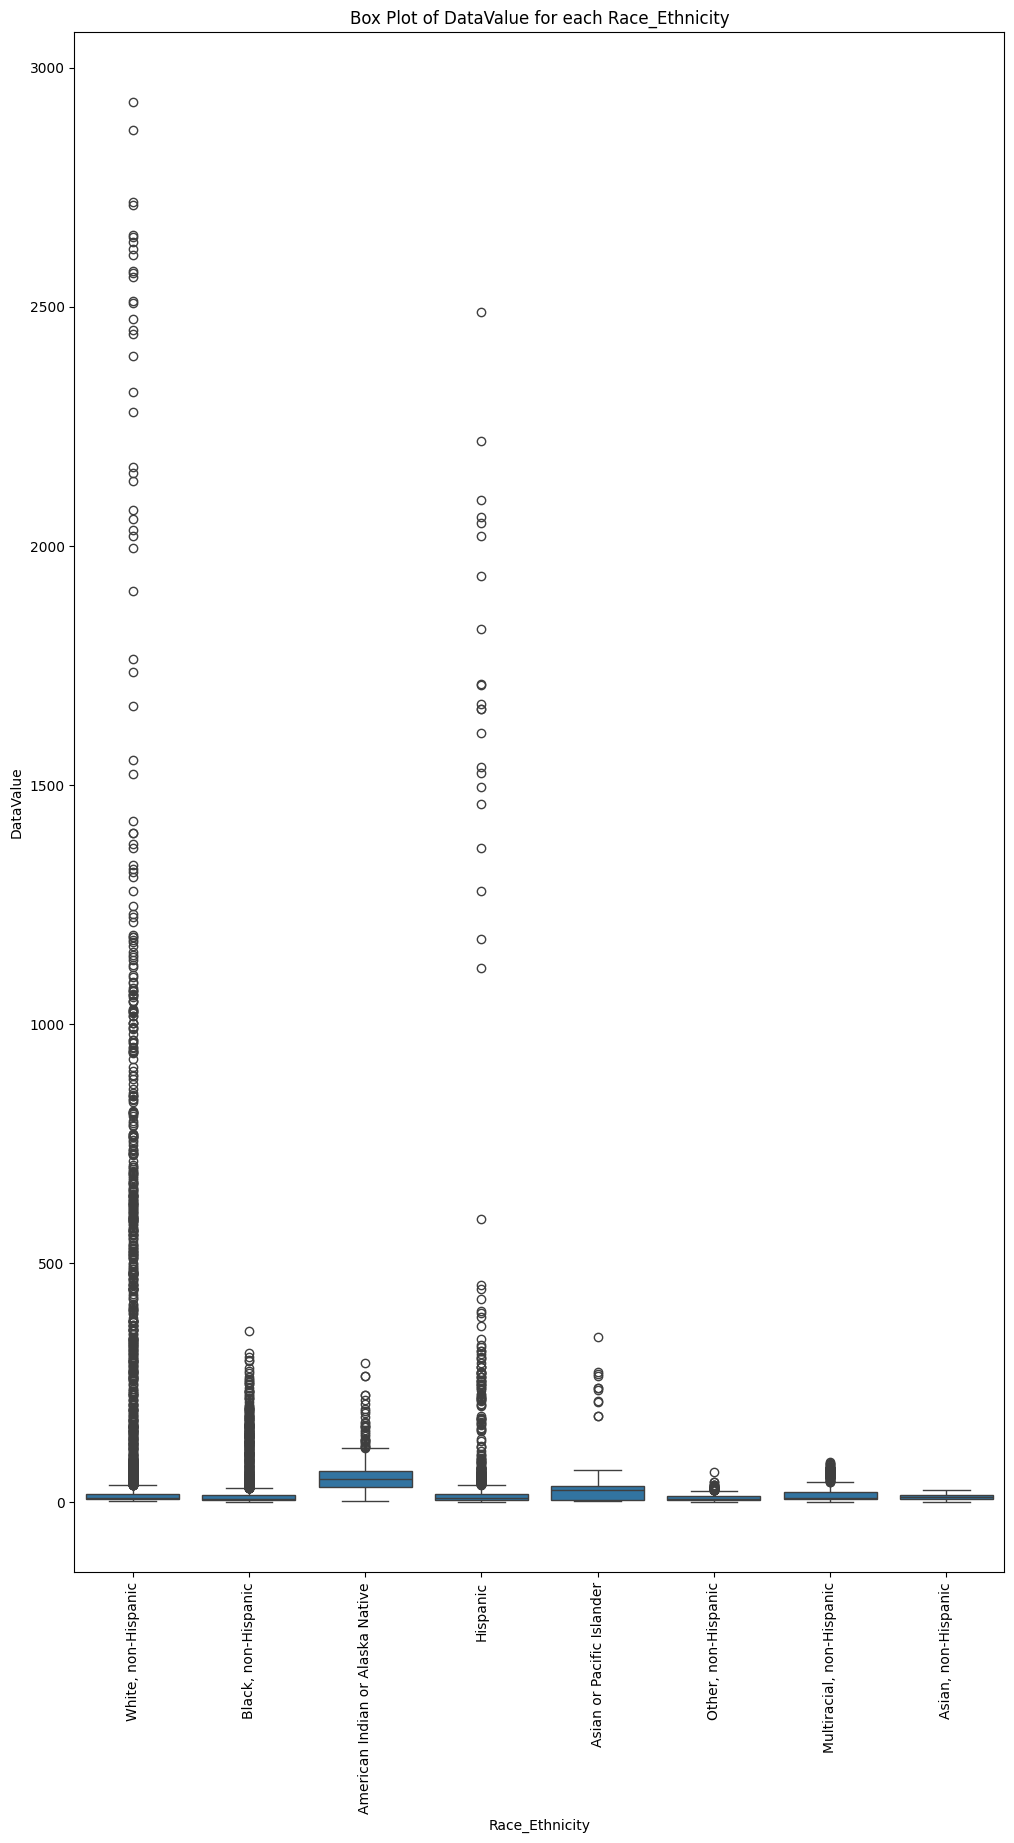

In [176]:
plt.figure(figsize=(12,20))
sns.boxplot(x='Race_Ethnicity', y='DataValue', data=national_merged_MA)
plt.title('Box Plot of DataValue for each Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

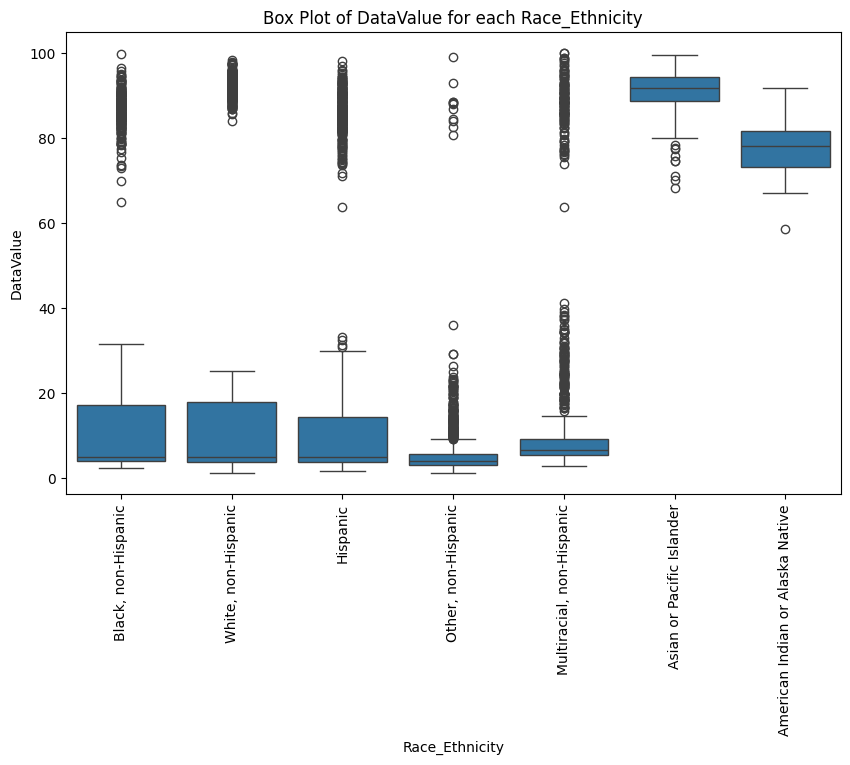

In [177]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Race_Ethnicity', y='DataValue', data=national_merged_MR)
plt.title('Box Plot of DataValue for each Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

In [180]:
mh_al_mi= mh_al_mi.rename(columns={'Race/Ethnicity': 'Race_Ethnicity'})

In [ ]:
mh_al_mi = mh_

In [181]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Race/Ethnicity', y='DataValue', data=mh_al_mi)
plt.title('Box Plot of DataValue for each Race_Ethnicity')
plt.xlabel('Race_Ethnicity')
plt.ylabel('DataValue')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `Race/Ethnicity` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

# Comparative Analysis
Compare and contrast different subsets of your data. This can include comparisons over time, across different categories, or any other relevant segmentation. Note that for some projects, the nature of this comparative analysis will be obvious. For others, you will need to think about how
you might subset your data.

Discuss any notable similarities or differences you have identified.

/var/folders/6t/t91z119x51q_lpb_lspp0sjw0000gn/T/ipykernel_70847/1900581194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_alcohol_percapita_df['DataValue'] = pd.to_numeric(national_alcohol_percapita_df['DataValue'], errors='coerce')


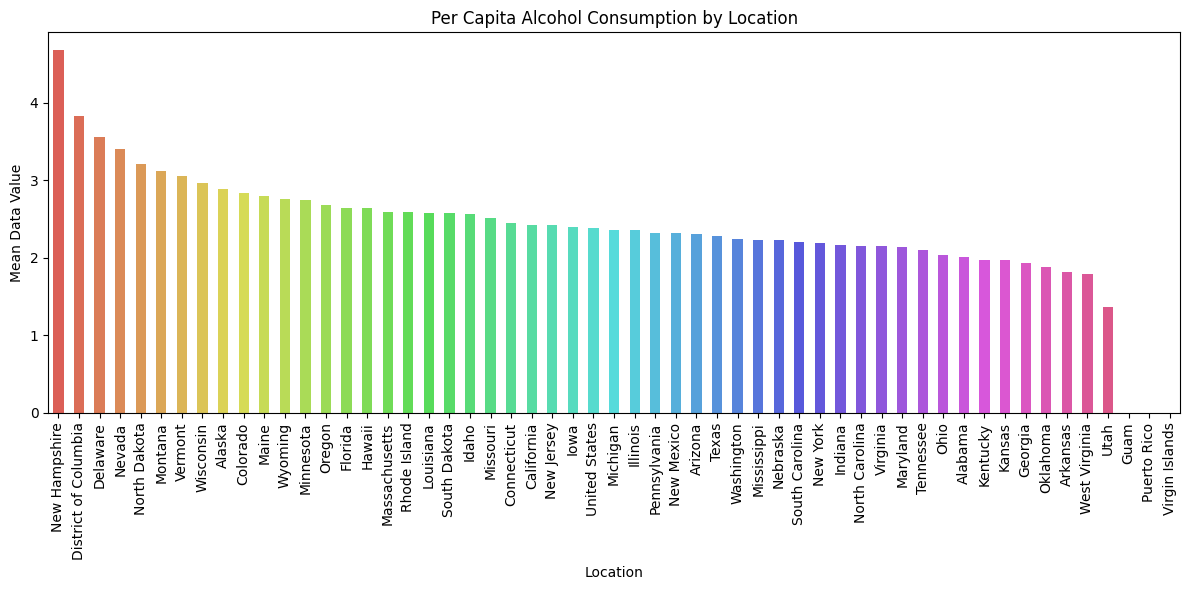

In [74]:
# Convert 'DataValue' to numeric, errors='coerce' will turn invalid values into NaN
national_alcohol_percapita_df['DataValue'] = pd.to_numeric(national_alcohol_percapita_df['DataValue'], errors='coerce')

# Group by 'LocationDesc' and calculate the mean data value for each location
national_alc_percapita_grouped_df = national_alcohol_percapita_df.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

palette = sns.color_palette("hls", len(national_alc_percapita_grouped_df))

national_alc_percapita_grouped_df.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Per Capita Alcohol Consumption by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [65]:
national_merged_MA['DataValue'] = pd.to_numeric(national_merged_MA['DataValue'], errors='coerce')

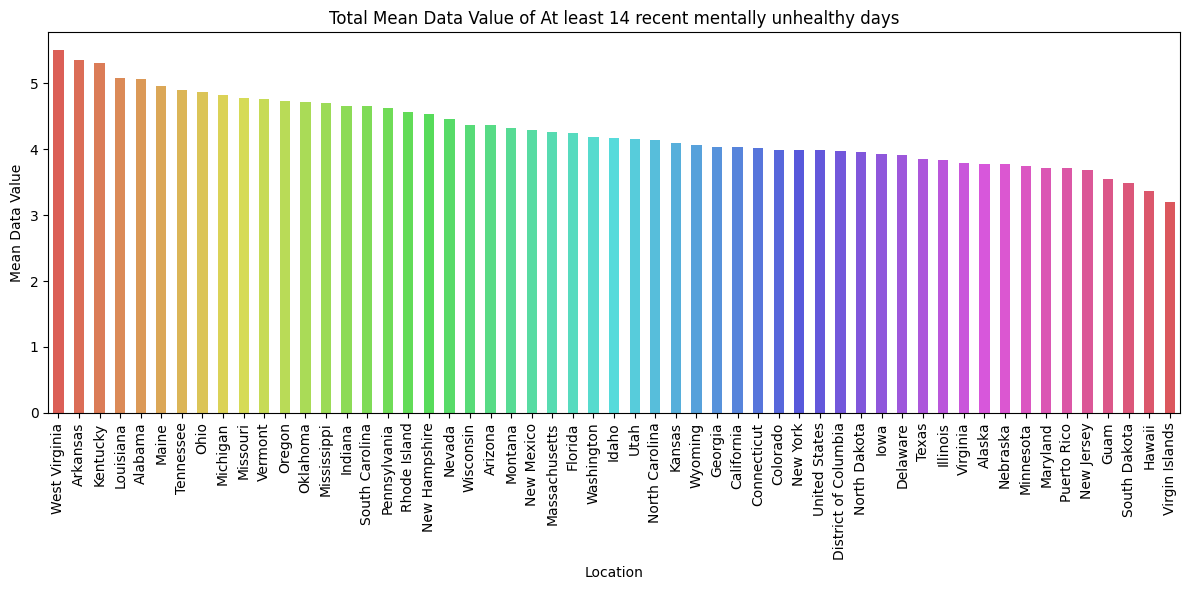

In [66]:
mental_natl_fourteen_days = national_merged_MA[national_merged_MA['Question'] ==  'Recent mentally unhealthy days among adults aged >= 18 years']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_mental_natl_fourteen_days = mental_natl_fourteen_days.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_mental_natl_fourteen_days))

grouped_mental_natl_fourteen_days.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of At least 14 recent mentally unhealthy days')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# national_merged_MA.DataValueType.unique()

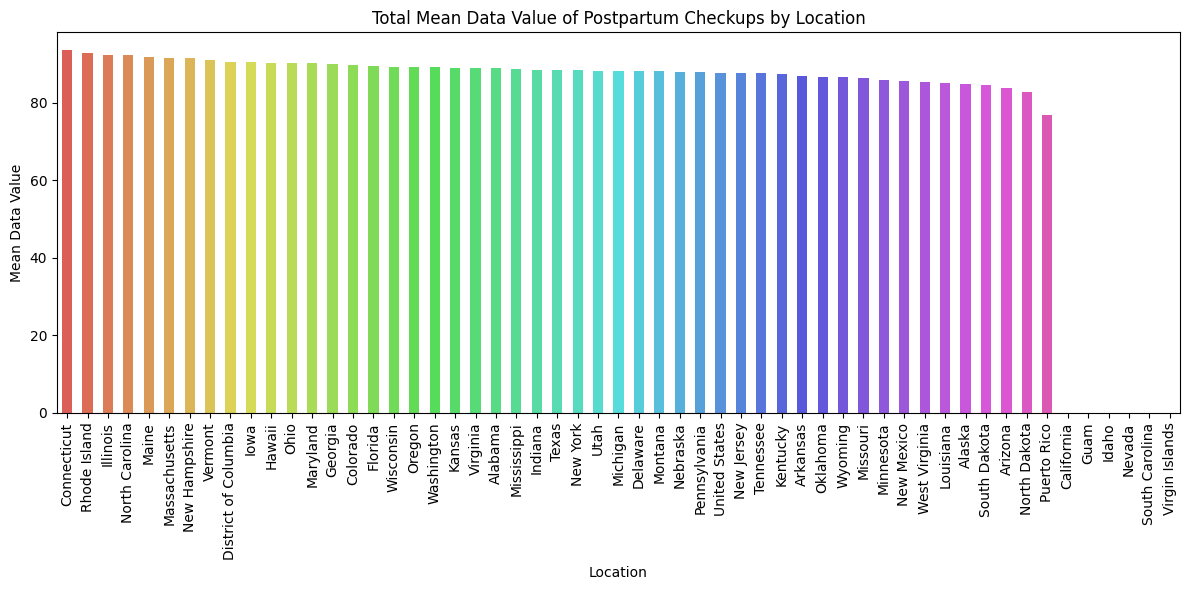

In [68]:
repro_natl_postpartum_checkup = national_merged_MR[national_merged_MR['Question'] == 'Postpartum checkup']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_repro_postpartum_checkup = repro_natl_postpartum_checkup.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_repro_postpartum_checkup))

grouped_repro_postpartum_checkup.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of Postpartum Checkups by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


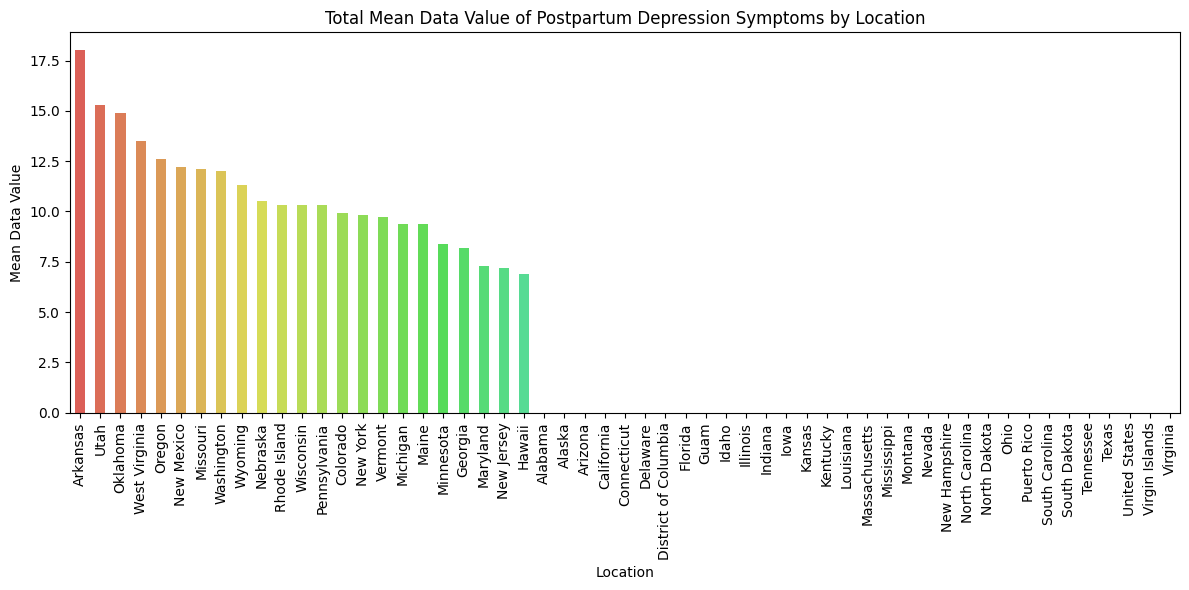

In [69]:
repro_natl_postpartum_depression = national_merged_MR[national_merged_MR['Question'] == 'Postpartum depressive symptoms']

# Group by 'LocationDesc' and calculate the mean data value for each location
grouped_repro_postpartum_depression = repro_natl_postpartum_depression.groupby('LocationDesc')['DataValue'].mean().sort_values(ascending=False)

# Create a color palette
palette = sns.color_palette("hls", len(grouped_repro_postpartum_checkup))

grouped_repro_postpartum_depression.plot(kind='bar', figsize=(12, 6), color=palette)
plt.title('Total Mean Data Value of Postpartum Depression Symptoms by Location')
plt.xlabel('Location')
plt.ylabel('Mean Data Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Multivariate Analysis
Perform multivariate analysis to understand the relationships among three or more variables in your dataset.

Use techniques like cross-tabulation, pivot tables, and multivariate graphs.

LocationDesc                      Alabama  Alaska  Arizona  Arkansas  \
Race_Ethnicity                                                         
American Indian or Alaska Native        0      48       35         0   
Asian or Pacific Islander               0       9        1         0   
Asian, non-Hispanic                     0       2        0         0   
Black, non-Hispanic                   179       8       62       127   
Hispanic                               35      49      170        48   
Multiracial, non-Hispanic              21      57       33        30   
Other, non-Hispanic                    28     119       91        24   
White, non-Hispanic                   184     188      181       186   

LocationDesc                      California  Colorado  Connecticut  Delaware  \
Race_Ethnicity                                                                  
American Indian or Alaska Native          33        18            0         0   
Asian or Pacific Islander           

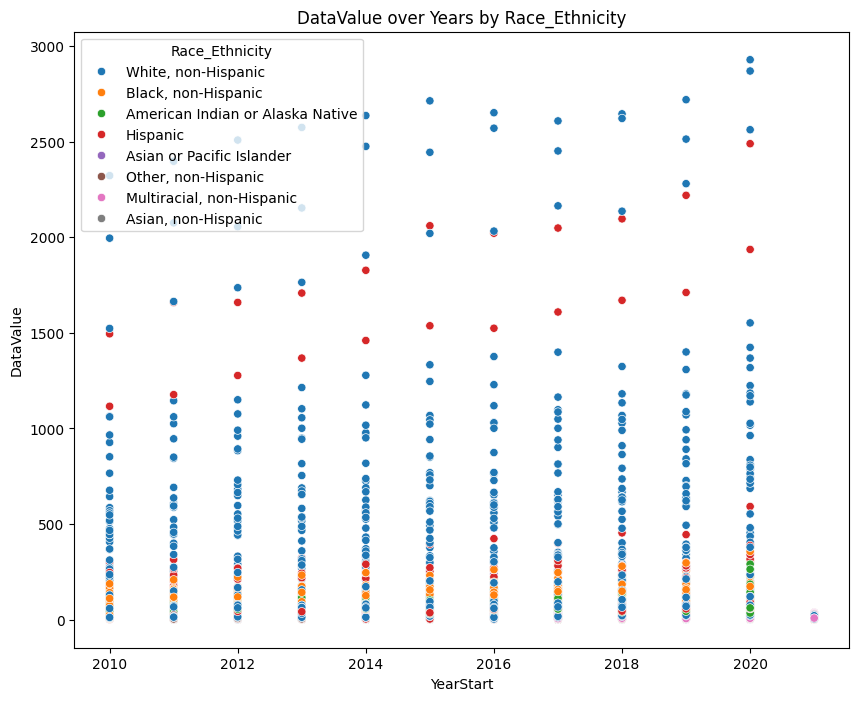

In [165]:
# Cross-tabulation
cross_tab = pd.crosstab(national_merged_MA['Race_Ethnicity'], national_merged_MA['LocationDesc'])
print(cross_tab)

# Pivot table
pivot_table = national_merged_MA.pivot_table(values='DataValue', index='Race_Ethnicity', columns='LocationDesc')
print(pivot_table)

# Multivariate graph
plt.figure(figsize=(10, 8))
sns.scatterplot(data=national_merged_MA, x='YearStart', y='DataValue', hue='Race_Ethnicity')
plt.title('DataValue over Years by Race_Ethnicity')
plt.show()

In [166]:
# Regression analysis
MA_model = smf.ols('DataValue ~ Race_Ethnicity + LocationDesc', data=national_merged_MA).fit()
print(MA_model.summary())

# ANOVA
anova_results = sm.stats.anova_lm(MA_model, typ=2)
print(anova_results)

# Chi-squared test
contingency_table = pd.crosstab(national_merged_MA['Race_Ethnicity'], national_merged_MA['LocationDesc'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}, p-value: {p}")

                            OLS Regression Results                            
Dep. Variable:              DataValue   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.64
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          2.11e-133
Time:                        02:27:12   Log-Likelihood:            -1.6688e+05
No. Observations:               26764   AIC:                         3.339e+05
Df Residuals:                   26702   BIC:                         3.344e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [168]:
# Filter the dataset for 'Binge drinking frequency among adults aged >= 18 years who binge drink'
binge_drinking_df = national_merged_MA[national_merged_MA['Question'] == 'Binge drinking frequency among adults aged >= 18 years who binge drink']

# Define the order of hue categories
hue_order = binge_drinking_df['Race_Ethnicity'].unique()

# Multivariate graph
sns.boxplot(x='Race/Ethnicity', y='DataValue', hue='Gender', data=binge_drinking_df, palette='Set3', hue_order=hue_order)
plt.title('Binge Drinking Frequency by Race_Ethnicity and Gender')
plt.xlabel('Race_Ethnicity')
plt.ylabel('Frequency of Binge Drinking')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

ValueError: Could not interpret value `Race/Ethnicity` for `x`. An entry with this name does not appear in `data`.